# 0.掛接雲端硬碟

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0_1安裝套件

In [2]:
!pip install pandas
!pip install tqdm

Matplotlib下載

In [3]:
#程式來源：112-2LATIA week3 課程示範程式
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-01 06:40:46--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.12.138, 108.177.12.113, 108.177.12.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-01 06:40:46--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  67.0MB/s    in 0.3s    

2024-04-01 06:40:

# 1.切換資料夾並顯示資料夾下的內容

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
# 切換目錄
os.chdir("/content/gdrive/MyDrive/LATIA112-2/HW1/")
# 列出目錄下的檔案
!ls -l "/content/gdrive/MyDrive/LATIA112-2/HW1/"

Mounted at /content/gdrive/
total 20390
-rw------- 1 root root   217319 Apr  1 06:40 HW1.ipynb
-rw------- 1 root root 20659344 Jul  4  2019 TaipeiSansTCBeta-Regular.ttf
-rw------- 1 root root     1274 Feb 27 06:02 公教職員教育程度結構.csv


# 2.導入CSV檔

In [5]:
import pandas as pd

#導入要使用的CSV檔
csv_file ="/content/gdrive/MyDrive/LATIA112-2/HW1/公教職員教育程度結構.csv"
#print("finish")##檢查用

df0 = pd.read_csv(csv_file) # 讀取csv檔案
df = df0.rename(columns = {
    "field1":"年",
    "field2":"公教職員大專以上程度男",
    "field3":"公教職員大專以上程度女",
    "field4":"公教職員高中職程度男",
    "field5":"公教職員高中職程度女",
    "field6":"公教職員國中以下程度男",
    "field7":"公教職員國中以下程度女",
    "field8":"公務人員大專以上程度男",
    "field9":"公務人員大專以上程度女",
    "field10":"公務人員高中職程度男",
    "field11":"公務人員高中職程度女",
    "field12":"公務人員國中以下程度男",
    "field13":"公務人員國中以下程度女"
})
#df = pd.read_csv(csv_file) # 讀取csv檔案
print(df.head())

#查看資料欄位資訊
print(df.info())

#查看資料的統計學資訊描述
#print(df.describe(include='all'))

      年 公教職員大專以上程度男 公教職員大專以上程度女 公教職員高中職程度男 公教職員高中職程度女 公教職員國中以下程度男 公教職員國中以下程度女  \
0  2006           -           -          -          -           -           -   
1  2007           -           -          -          -           -           -   
2  2008       87.05        97.7      12.94       2.17        0.01        0.13   
3  2009       87.71       98.03      12.28       1.95        0.01        0.03   
4  2010       87.79        97.7      12.21       2.27           0        0.03   

  公務人員大專以上程度男 公務人員大專以上程度女 公務人員高中職程度男 公務人員高中職程度女 公務人員國中以下程度男 公務人員國中以下程度女  
0           -           -          -          -           -           -  
1           -           -          -          -           -           -  
2       78.77       89.88      21.22       9.55        0.01        0.57  
3       79.98       92.05      20.01       7.83        0.01        0.12  
4       80.99       92.24      19.01       7.65           0         0.1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16

# 3.提問
1. 將2022年公教職教育程度結構分別以「公教職員」和「公務人員」分別呈現，必須將「男女」分開呈現。
2. 「公教職員大專以上程度男」和「公教職員大專以上程度女」各自在哪一年佔比最高？
3. 截至2022年，公務人員教育程度在國中以下的人員佔比趨勢為何？請將男女資料呈現於同一張折線圖。
4. 2016年，公務人員各等級教育程度水平長條圖？
5. 公教職員各等級教育程度在2011年的分別佔比為？請用折線圖，男女要在一張圖。
6. 2019年女性公教職員和公務人員各等級教育程度佔比為何？請用柱狀圖。

# 4.解題



# 1. 將2022年公教職教育程度結構分別以「公教職員」和「公務人員」分別呈現，必須將「男女」分開呈現。



In [84]:
df1 = df
#建立變數
num_of_year = 0 #想要查看的年份的編號變數
#取得2022年數據的編號
for item in df1:
  for i in range(len(df1)):
    if df1.loc[i,'年'] == 2022:
      num_of_year = i
    else:
      num_of_year = num_of_year
df1_1 = df1.iloc[i][1:7].values.flatten()#公教職員
df1_2 = df1.iloc[i][7:].values.flatten()#公務人員

#轉換成數值形式儲存
#男
new_df1_1 = []
for item in df1_1:
  if item.replace('.','',1).isdigit():
    new_df1_1.append(float(item))
  else:
    new_df1_1.append(0)
#女
new_df1_2 = []
for item in df1_2:
  if item.replace('.','',1).isdigit():
    new_df1_2.append(float(item))
  else:
    new_df1_2.append(0)

#公教職員男女分類
df1_1_male = [] #男
df1_1_female = [] #女
for j in range(len(new_df1_1)):
  if (j%2) == 0:
    df1_1_male.append(new_df1_1[j])
  else:
    df1_1_female.append(new_df1_1[j])

#公務人員男女分類
df1_2_male = [] #男
df1_2_female = [] #女
for k in range(len(new_df1_2)):
  if (k%2) == 0:
    df1_2_male.append(new_df1_2[k])
  else:
    df1_2_female.append(new_df1_2[k])
print(f"公教職員男性教育程度大專以上佔 {df1_1_male[0]} ％，高中職佔 {df1_1_male[1]} ％，國中以下佔 {df1_1_male[2]} ％。")
print(f"公教職員女性教育程度大專以上佔 {df1_1_female[0]} ％，高中職佔 {df1_1_female[1]} ％，國中以下佔 {df1_1_female[2]} ％。")
print(f"公務人員男性教育程度大專以上佔 {df1_2_male[0]} ％，高中職佔 {df1_2_male[1]} ％，國中以下佔 {df1_2_male[2]} ％。")
print(f"公務人員女性教育程度大專以上佔 {df1_2_female[0]} ％，高中職佔 {df1_2_female[1]} ％，國中以下佔 {df1_2_female[2]} ％。")

公教職員男性教育程度大專以上佔 97.0935371497 ％，高中職佔 2.880465866 ％，國中以下佔 0.0259969843 ％。
公教職員女性教育程度大專以上佔 99.1968184654 ％，高中職佔 0.7914847162 ％，國中以下佔 0.0116968185 ％。
公務人員男性教育程度大專以上佔 95.736196319 ％，高中職佔 4.2254601227 ％，國中以下佔 0.0383435583 ％。
公務人員女性教育程度大專以上佔 97.6625781069 ％，高中職佔 2.3027077065 ％，國中以下佔 0.0347141865 ％。


繪製長條圖

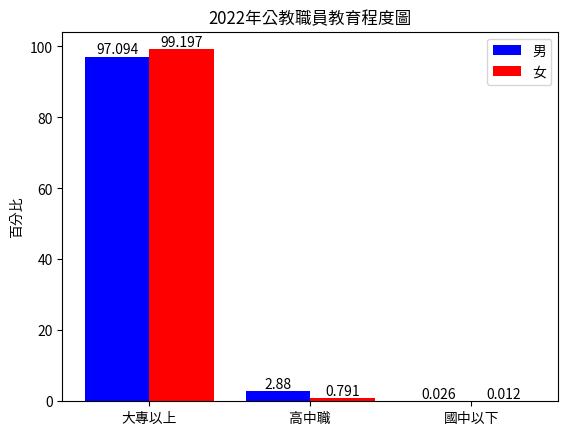

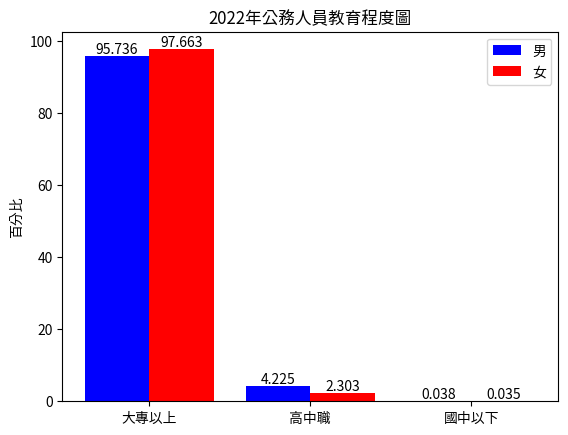

In [85]:
#數據
import numpy as np
xlabel = ['大專以上','高中職','國中以下']
bar_locate = np.arange(len(xlabel))
bar_width = 0.4

fig, ax = plt.subplots()
#繪製長條圖：公教職男
bars_df1_1_male = ax.bar(bar_locate - 0.2, df1_1_male, bar_width, color='b', label="男")
#繪製長條圖：公教職女
bars_df1_1_female = ax.bar(bar_locate + 0.2, df1_1_female, bar_width, color='r', label="女")
ax.set_title('2022年公教職員教育程度圖')
ax.set_ylabel('百分比')
ax.set_xticks(bar_locate)
ax.set_xticklabels(xlabel)
ax.legend(loc = "upper right")

for bar in bars_df1_1_male:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3)), ha='center', va='bottom')
for bar in bars_df1_1_female:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3)), ha='center', va='bottom')
plt.savefig("第一題_2022年公教職員教育程度圖.png")
plt.show()

fig, ax = plt.subplots()
#繪製長條圖：公務員男
bars_df1_2_male = ax.bar(bar_locate - 0.2, df1_2_male, bar_width, color='b', label="男")
#繪製長條圖：公務員女
bars_df1_2_female = ax.bar(bar_locate + 0.2, df1_2_female, bar_width, color='r', label="女")
ax.set_title('2022年公務人員教育程度圖')
ax.set_ylabel('百分比')
ax.set_xticks(bar_locate)
ax.set_xticklabels(xlabel)
ax.legend(loc = "upper right")

for bar in bars_df1_2_male:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3)), ha='center', va='bottom')
for bar in bars_df1_2_female:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3)), ha='center', va='bottom')
plt.savefig("第一題_2022年公務人員教育程度圖.png")
plt.show()

# 2. 「公教職員大專以上程度男」和「公教職員大專以上程度女」各自在哪一年佔比最高？

In [86]:
#取出要觀看的資料
df2 = df[['年','公教職員大專以上程度男','公教職員大專以上程度女']]
print(f'本資料集共收集 {len(df2)} 筆資料')

#建立儲存佔比最大年份的字串
male_list = list(df2['公教職員大專以上程度男'])
female_list = list(df2['公教職員大專以上程度女'])
max_male = male_list[0]
max_female = female_list[0]
yearnum_max_male = 0
yearnum_max_female = 0

#迴圈比大小
#大專男
for male in male_list:
  for i in range(len(male_list)):
    if max_male < male_list[i]:
      max_male = male_list[i]
      yearnum_max_male = i
#print(max_male, df2['年'][yearnum_max_male])
#大專女
for female in female_list:
  for i in range(len(female_list)):
    if max_female < female_list[i]:
      max_female = female_list[i]
      yearnum_max_female = i
#print(max_female, df2['年'][yearnum_max_female])

year_max_male = df2['年'][yearnum_max_male]
year_max_female = df2['年'][yearnum_max_female]
#呈現結果
print(f'公教職員大專以上程度男在 {year_max_male} 年佔比最高，有 {max_male} ％')
print(f'公教職員大專以上程度女在 {year_max_female} 年佔比最高，有 {max_female} ％')

本資料集共收集 17 筆資料
公教職員大專以上程度男在 2014 年佔比最高，有 98.16 ％
公教職員大專以上程度女在 2022 年佔比最高，有 99.1968184654 ％




> 繪製柱狀圖



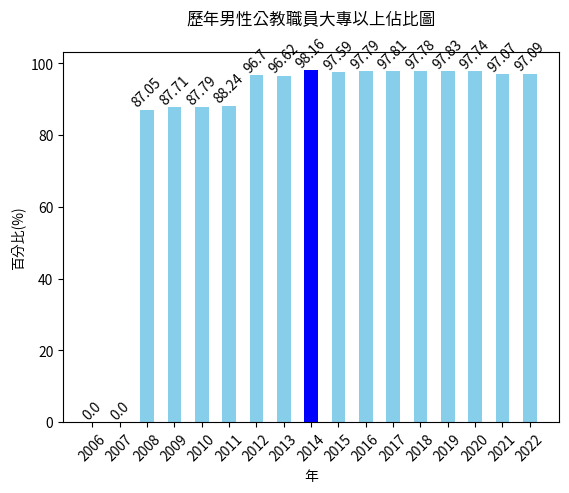

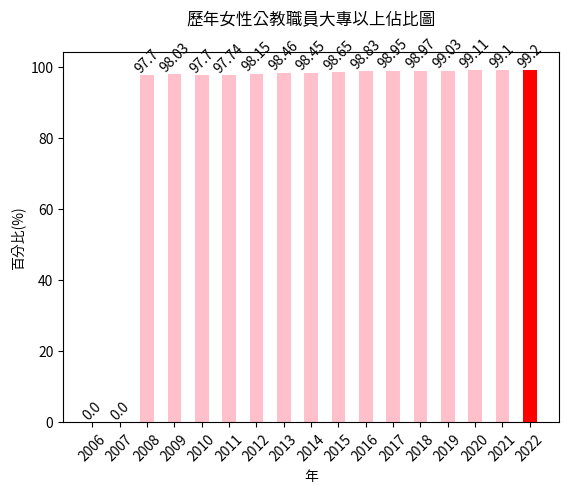

In [87]:
#取得要使用的數據
year_list = list(df2['年'])
df2_1 = df[['公教職員大專以上程度男']]
df2_1_list = list(df2_1['公教職員大專以上程度男'])
df2_2 = df[['公教職員大專以上程度女']]
df2_2_list = list(df2_2['公教職員大專以上程度女'])

#將非數值的字元轉換成0
#男
new_df2_1_list = []
for item in df2_1_list:
  if item.replace('.','',1).isdigit():
    new_df2_1_list.append(float(item))
  else:
    new_df2_1_list.append(0)
#女
new_df2_2_list = []
for item in df2_2_list:
  if item.replace('.','',1).isdigit():
    new_df2_2_list.append(float(item))
  else:
    new_df2_2_list.append(0)

#最大值的顏色區分
#男
colors_list_male = []
for item in year_list:
  for i in range(len(year_list)):
    if year_list[i] == year_max_male:
      colors_list_male.append('blue')
    else:
      colors_list_male.append('skyblue')
#女
colors_list_female = []
for item in year_list:
  for i in range(len(year_list)):
    if year_list[i] == year_max_female:
      colors_list_female.append('red')
    else:
      colors_list_female.append('pink')

#繪圖
bars_male = plt.bar(year_list, new_df2_1_list, width=0.5, color=colors_list_male)
plt.xticks(range(min(year_list),max(year_list)+1),rotation=45)
plt.title('歷年男性公教職員大專以上佔比圖\n ')
plt.xlabel('年')
plt.ylabel('百分比(%)')

for bar in bars_male:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 2)), ha='center', va='bottom', rotation=45)
plt.savefig("第二題_歷年男性公教職員大專以上佔比圖.png")
plt.show()

bars_female = plt.bar(year_list, new_df2_2_list, width=0.5, color=colors_list_female)
plt.xticks(range(min(year_list),max(year_list)+1),rotation=45)
plt.title('歷年女性公教職員大專以上佔比圖\n ')
plt.xlabel('年')
plt.ylabel('百分比(%)')

for bar in bars_female:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 2)), ha='center', va='bottom', rotation=45)
plt.savefig("第二題_歷年女性公教職員大專以上佔比圖.png")
plt.show()

# 3.截至2022年，公務人員教育程度在國中以下的人員佔比趨勢為何？請將男女資料呈現於同一張折線圖。

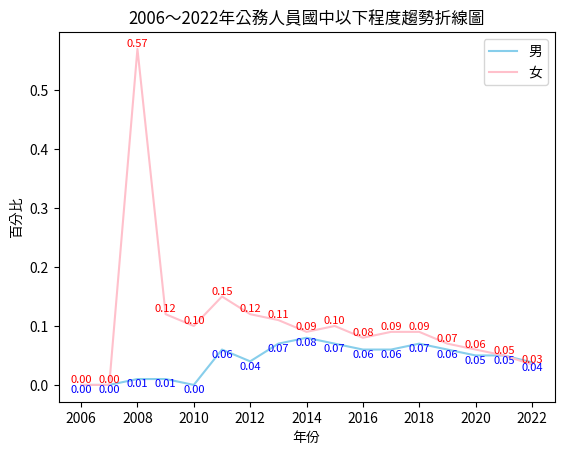

In [88]:
df3 = df[['年','公務人員國中以下程度男','公務人員國中以下程度女']]
#建立變數
num_of_year = 0 #想要查看的年份的編號變數
#取得2022年數據的編號
for item in df3:
  for i in range(len(df3)):
    if df3.loc[i,'年'] == 2022:
      num_of_year = i
    else:
      num_of_year = num_of_year
df3_year = list(df3['年'][0:(num_of_year+1)])
df3_male = list(df3['公務人員國中以下程度男'][0:(num_of_year+1)])
df3_female = list(df3['公務人員國中以下程度女'][0:(num_of_year+1)])

#非數值字元轉換
#男
new_df3_male = []
for item in df3_male:
  if item.replace('.','',1).isdigit():
    new_df3_male.append(float(item))
  else:
    new_df3_male.append(0)
#女
new_df3_female = []
for item in df3_female:
  if item.replace('.','',1).isdigit():
    new_df3_female.append(float(item))
  else:
    new_df3_female.append(0)

#折線圖繪製
plot_df3_male = plt.plot(df3_year, new_df3_male, color='skyblue', label = '男')
plot_df3_female = plt.plot(df3_year, new_df3_female, color='pink', label = '女')
plt.xlabel('年份')
plt.ylabel('百分比')
plt.title('2006～2022年公務人員國中以下程度趨勢折線圖')
plt.legend()

for i in range(len(df3_year)):
  plt.text(df3_year[i], new_df3_male[i], f"{new_df3_male[i]:.2f}", fontsize=8, ha='center', va='top', color='b')
  plt.text(df3_year[i], new_df3_female[i], f"{new_df3_female[i]:.2f}",  fontsize=8, ha='center', va='bottom', color='r')
plt.savefig("第三題_2006～2022年公務人員國中以下程度趨勢折線圖.png")
plt.show()

# 4. 2016年，公務人員各等級教育程度水平長條圖？

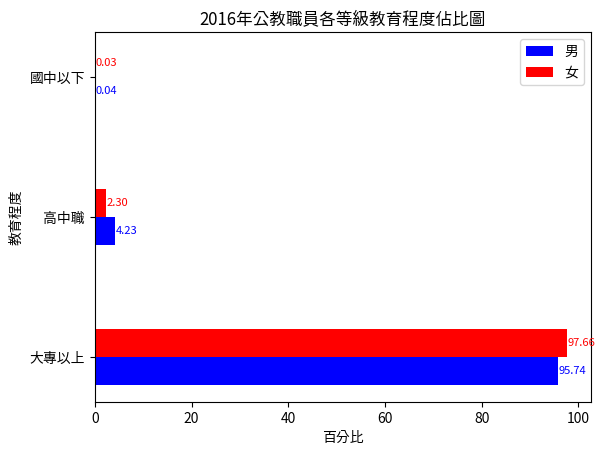

In [89]:
df4 = df
#建立變數
num_of_year_df4 = 0 #想要查看的年份的編號變數
#取得2011年數據的編號
for item in df4:
  for i in range(len(df4)):
    if df4.loc[i,'年'] == 2016:
      num_of_year_df4 = i
    else:
      num_of_year_df4 = num_of_year_df4
df4_1 = df4.iloc[i][7:].values.flatten()#公務人員

#公務人員男女分類
df4_1_male = [] #男
df4_1_female = [] #女
for j in range(len(df4_1)):
  if (j%2) == 0:
    df4_1_male.append(df4_1[j])
  else:
    df4_1_female.append(df4_1[j])

#轉換成數值形式儲存
new_df4_male = []
for item in df4_1_male:
  if item.replace('.','',1).isdigit():
    new_df4_male.append(float(item))
  else:
    new_df4_male.append(0)
#女
new_df4_female = []
for item in df4_1_female:
  if item.replace('.','',1).isdigit():
    new_df4_female.append(float(item))
  else:
    new_df4_female.append(0)

#繪製水平長條圖
import numpy as np
ylabel = ['大專以上','高中職','國中以下']
barh_locate = np.arange(len(ylabel))
barh_height = 0.2

fig, ax = plt.subplots()
barh_df4_male = ax.barh(barh_locate - 0.1, new_df4_male,  barh_height, color='b',  label="男")
barh_df4_female = ax.barh(barh_locate + 0.1, new_df4_female, barh_height, color='r', label="女")
ax.set_xlabel('百分比')
ax.set_ylabel('教育程度')
ax.set_title('2016年公教職員各等級教育程度佔比圖')
ax.set_yticks(barh_locate)
ax.set_yticklabels(ylabel)
ax.legend()
for index, value in enumerate(new_df4_male):
  ax.text(value+0.1, index-0.1, "{:.2f}".format(value), fontsize=8, ha='left', va='center', color='b')
for index, value in enumerate(new_df4_female):
  ax.text(value+0.1, index+0.1, "{:.2f}".format(value), fontsize=8, ha='left', va='center', color='r')
plt.savefig("第四題_2016年公教職員各等級教育程度佔比圖.png")
plt.show()

# 5. 公教職員各等級教育程度在2011年的分別佔比為？請用折線圖，男女要在一張圖。

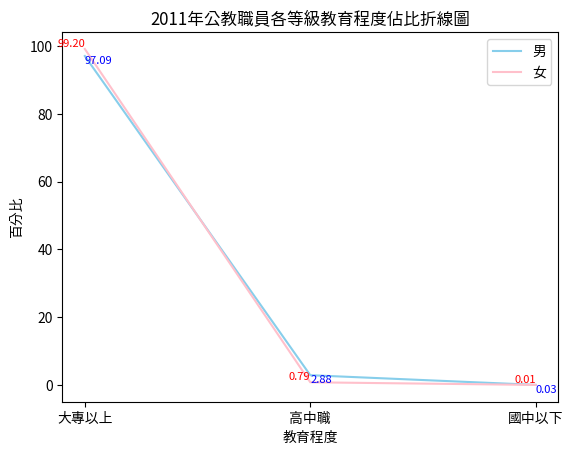

In [90]:
df5 = df
#建立變數
num_of_year_df5 = 0 #想要查看的年份的編號變數
#取得2011年數據的編號
for item in df5:
  for i in range(len(df5)):
    if df5.loc[i,'年'] == 2011:
      num_of_year_df5 = i
    else:
      num_of_year_df5 = num_of_year_df5
df5_1 = df5.iloc[i][1:7].values.flatten()#公教職員

#公教職員男女分類
df5_1_male = [] #男
df5_1_female = [] #女
for j in range(len(df5_1)):
  if (j%2) == 0:
    df5_1_male.append(df5_1[j])
  else:
    df5_1_female.append(df5_1[j])

#轉換成數值形式儲存
new_df5_male = []
for item in df5_1_male:
  if item.replace('.','',1).isdigit():
    new_df5_male.append(float(item))
  else:
    new_df5_male.append(0)
#女
new_df5_female = []
for item in df5_1_female:
  if item.replace('.','',1).isdigit():
    new_df5_female.append(float(item))
  else:
    new_df5_female.append(0)

xlabel = ['大專以上','高中職','國中以下']

#繪製折線圖
plt.plot(xlabel,new_df5_male,color = "skyblue",label = '男')
plt.plot(xlabel,new_df5_female,color = "pink",label = '女')
plt.xlabel('教育程度')
plt.ylabel('百分比')
plt.title('2011年公教職員各等級教育程度佔比折線圖')
plt.legend()
for i in range(len(xlabel)):
  plt.text(xlabel[i], new_df5_male[i], f"{new_df5_male[i]:.2f}", fontsize=8, ha='left', va='top', color='b')
  plt.text(xlabel[i], new_df5_female[i], f"{new_df5_female[i]:.2f}",  fontsize=8, ha='right', va='bottom', color='r')
plt.savefig("第五題_2011年公教職員各等級教育程度佔比折線圖.png")
plt.show()

# 2019年女性公教職員和公務人員各等級教育程度佔比為何？請用柱狀圖。

In [91]:
df6 = df
#建立變數
num_of_year_df6 = 0 #想要查看的年份的編號變數
#取得2019年數據的編號
for item in df6:
  for i in range(len(df6)):
    if df6.loc[i,'年'] == 2019:
      num_of_year_df6 = i
    else:
      num_of_year_df6 = num_of_year_df6
df6_1 = df6.iloc[i][1:7].values.flatten()#公教職員
df6_2 = df6.iloc[i][7:].values.flatten()#公務人員

#公教職員女
df6_1_female = [] #女
for j in range(len(df6_1)):
  if (j%2) != 0:
    df6_1_female.append(df6_1[j])
  else:
    next

#公務人員女
df6_2_female = [] #女
for k in range(len(df6_2)):
  if (k%2) != 0:
    df6_2_female.append(df6_2[k])
  else:
    next

#轉換成數值形式儲存
new_df6_1_female = []
for item in df6_1_female:
  if item.replace('.','',1).isdigit():
    new_df6_1_female.append(float(item))
  else:
    new_df6_1_female.append(0)
#女
new_df6_2_female = []
for item in df6_2_female:
  if item.replace('.','',1).isdigit():
    new_df6_2_female.append(float(item))
  else:
    new_df6_2_female.append(0)
print(f"2019年女性公教職員教育程度大專以上佔 {new_df6_1_female[0]} ％，高中職佔 {new_df6_1_female[1]} ％，國中以下佔 {new_df6_1_female[2]} ％。")
print(f"2019年女性公務人員教育程度大專以上佔 {new_df6_2_female[0]} ％，高中職佔 {new_df6_2_female[1]} ％，國中以下佔 {new_df6_2_female[2]} ％。")

2019年女性公教職員教育程度大專以上佔 99.1968184654 ％，高中職佔 0.7914847162 ％，國中以下佔 0.0116968185 ％。
2019年女性公務人員教育程度大專以上佔 97.6625781069 ％，高中職佔 2.3027077065 ％，國中以下佔 0.0347141865 ％。


繪製柱狀圖

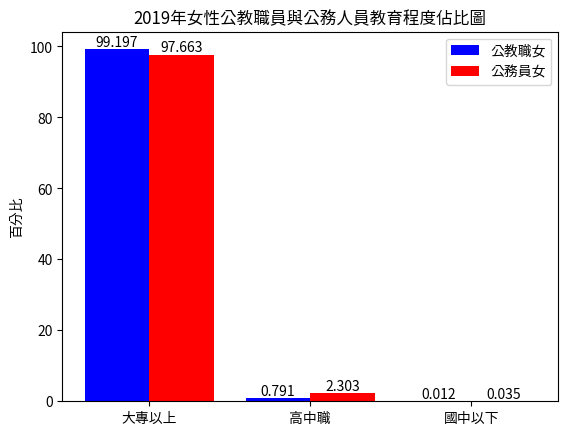

In [92]:
import numpy as np
df6_xlabel = ['大專以上','高中職','國中以下']
bar_df6_locate = np.arange(len(df6_xlabel))
bar_df6_width = 0.4

fig, ax = plt.subplots()
#繪製長條圖：公教職女
bars_df6_1_female = ax.bar(bar_df6_locate - 0.2, new_df6_1_female, bar_df6_width, color='b', label="公教職女")
#繪製長條圖：公務員女
bars_df6_2_female = ax.bar(bar_df6_locate + 0.2, new_df6_2_female, bar_df6_width, color='r', label="公務員女")
ax.set_title('2019年女性公教職員與公務人員教育程度佔比圖')
ax.set_ylabel('百分比')
ax.set_xticks(bar_df6_locate)
ax.set_xticklabels(df6_xlabel)
ax.legend(loc = "upper right")

for bar in bars_df6_1_female:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3)), ha='center', va='bottom')
for bar in bars_df6_2_female:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 3)), ha='center', va='bottom')
plt.savefig("第六題_2019年女性公教職員與公務人員教育程度佔比圖.png")
plt.show()